In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura da base de dados

In [34]:
df = pd.read_excel('./db.xlsx')
df.head()

,Ano,Faixa etária,Gênero,Raça/Cor,Magreza Acentuada Quantidade,Magreza Acentuada Porcentagem,Magreza Quantidade,Magreza Porcentagem,Eutrofia Quantidade,Eutrofia Porcentagem,Risco de Sobrepeso / Sobrepeso Quantidade,Risco de Sobrepeso / Sobrepeso Porcentagem,Sobrepeso / Obesidade Quantidade,Sobrepeso / Obesidade Porcentagem,Obesidade / Obesidade Grave Quantidade,Obesidade / Obesidade Grave Porcentagem,Total
0,2023 (parcial)*,De 0 até 4 anos,Todos,Todos,148258,0.02268,186061,0.02846,4092757,0.62605,1212641,0.18549,525140,0.08033,372600,0.05699,6537457
1,2023 (parcial)*,De 0 até 4 anos,Todos,Pretos,4349,0.02822,5266,0.03417,96877,0.62859,26504,0.17197,11754,0.07627,9367,0.06078,154117
2,2023 (parcial)*,De 0 até 4 anos,Todos,Pardos,47135,0.03509,51115,0.03805,853259,0.63519,205391,0.15290,95404,0.07102,91008,0.06775,1343312
3,2023 (parcial)*,De 0 até 4 anos,Todos,Brancos,31252,0.01689,46557,0.02517,1183699,0.63991,350823,0.18966,142306,0.07693,95145,0.05144,1849782
4,2023 (parcial)*,De 0 até 4 anos,Todos,Indígenas,1418,0.03149,1395,0.03097,28777,0.63896,8163,0.18125,3191,0.07085,2093,0.04647,45037


# Remove as colunas de porcentagem

In [35]:
colunas_filtradas = [coluna for coluna in df.columns if not coluna.endswith('Porcentagem')]

df = df[colunas_filtradas]

# Verifica se há elementos nulos

In [36]:
df.isnull().sum()

Ano                                          0
Faixa etária                                 0
Gênero                                       0
Raça/Cor                                     0
Magreza Acentuada Quantidade                 0
Magreza Quantidade                           0
Eutrofia Quantidade                          0
Risco de Sobrepeso / Sobrepeso Quantidade    0
Sobrepeso / Obesidade Quantidade             0
Obesidade / Obesidade Grave Quantidade       0
Total                                        0
dtype: int64

In [37]:
df.describe()

,Magreza Acentuada Quantidade,Magreza Quantidade,Eutrofia Quantidade,Risco de Sobrepeso / Sobrepeso Quantidade,Sobrepeso / Obesidade Quantidade,Obesidade / Obesidade Grave Quantidade,Total
count,810.000000,810.000000,8.100000e+02,8.100000e+02,8.100000e+02,810.000000,8.100000e+02
mean,34225.481481,48968.101235,9.878107e+05,2.701719e+05,1.319252e+05,82024.604938,1.555126e+06
std,51143.652578,73093.949104,1.482017e+06,4.035210e+05,1.959758e+05,122570.462952,2.314527e+06
min,21.000000,51.000000,1.458000e+03,3.110000e+02,1.220000e+02,30.000000,2.027000e+03
25%,2621.000000,3920.250000,8.373650e+04,2.201625e+04,1.043400e+04,5296.750000,1.311512e+05
50%,13849.000000,22468.000000,4.637265e+05,1.307825e+05,6.391500e+04,34030.500000,7.385860e+05
75%,43767.500000,63319.750000,1.249550e+06,3.433102e+05,1.700100e+05,102129.500000,1.954642e+06
max,347754.000000,581648.000000,1.165125e+07,3.193405e+06,1.625335e+06,898926.000000,1.816482e+07


# Plota a distribuição das quantidades por ano

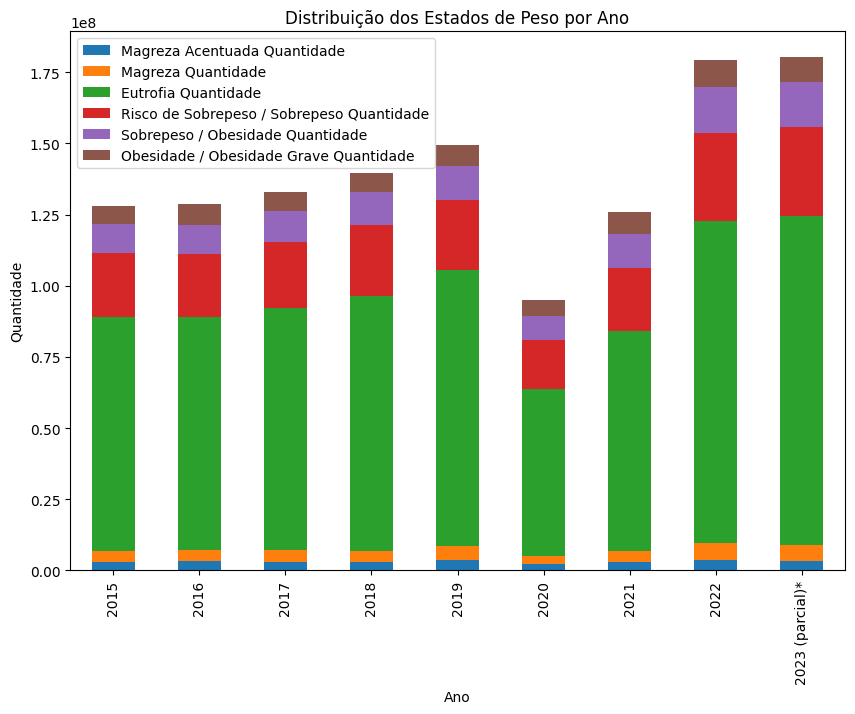

In [44]:
colunas_filtradas = [coluna for coluna in df.columns if not coluna.endswith('Total')]

ano_data = df[colunas_filtradas].groupby('Ano').sum()

ano_data.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Distribuição dos Estados de Peso por Ano')
plt.ylabel('Quantidade')
plt.show()

# Distribuição de Faixa Etária por Ano

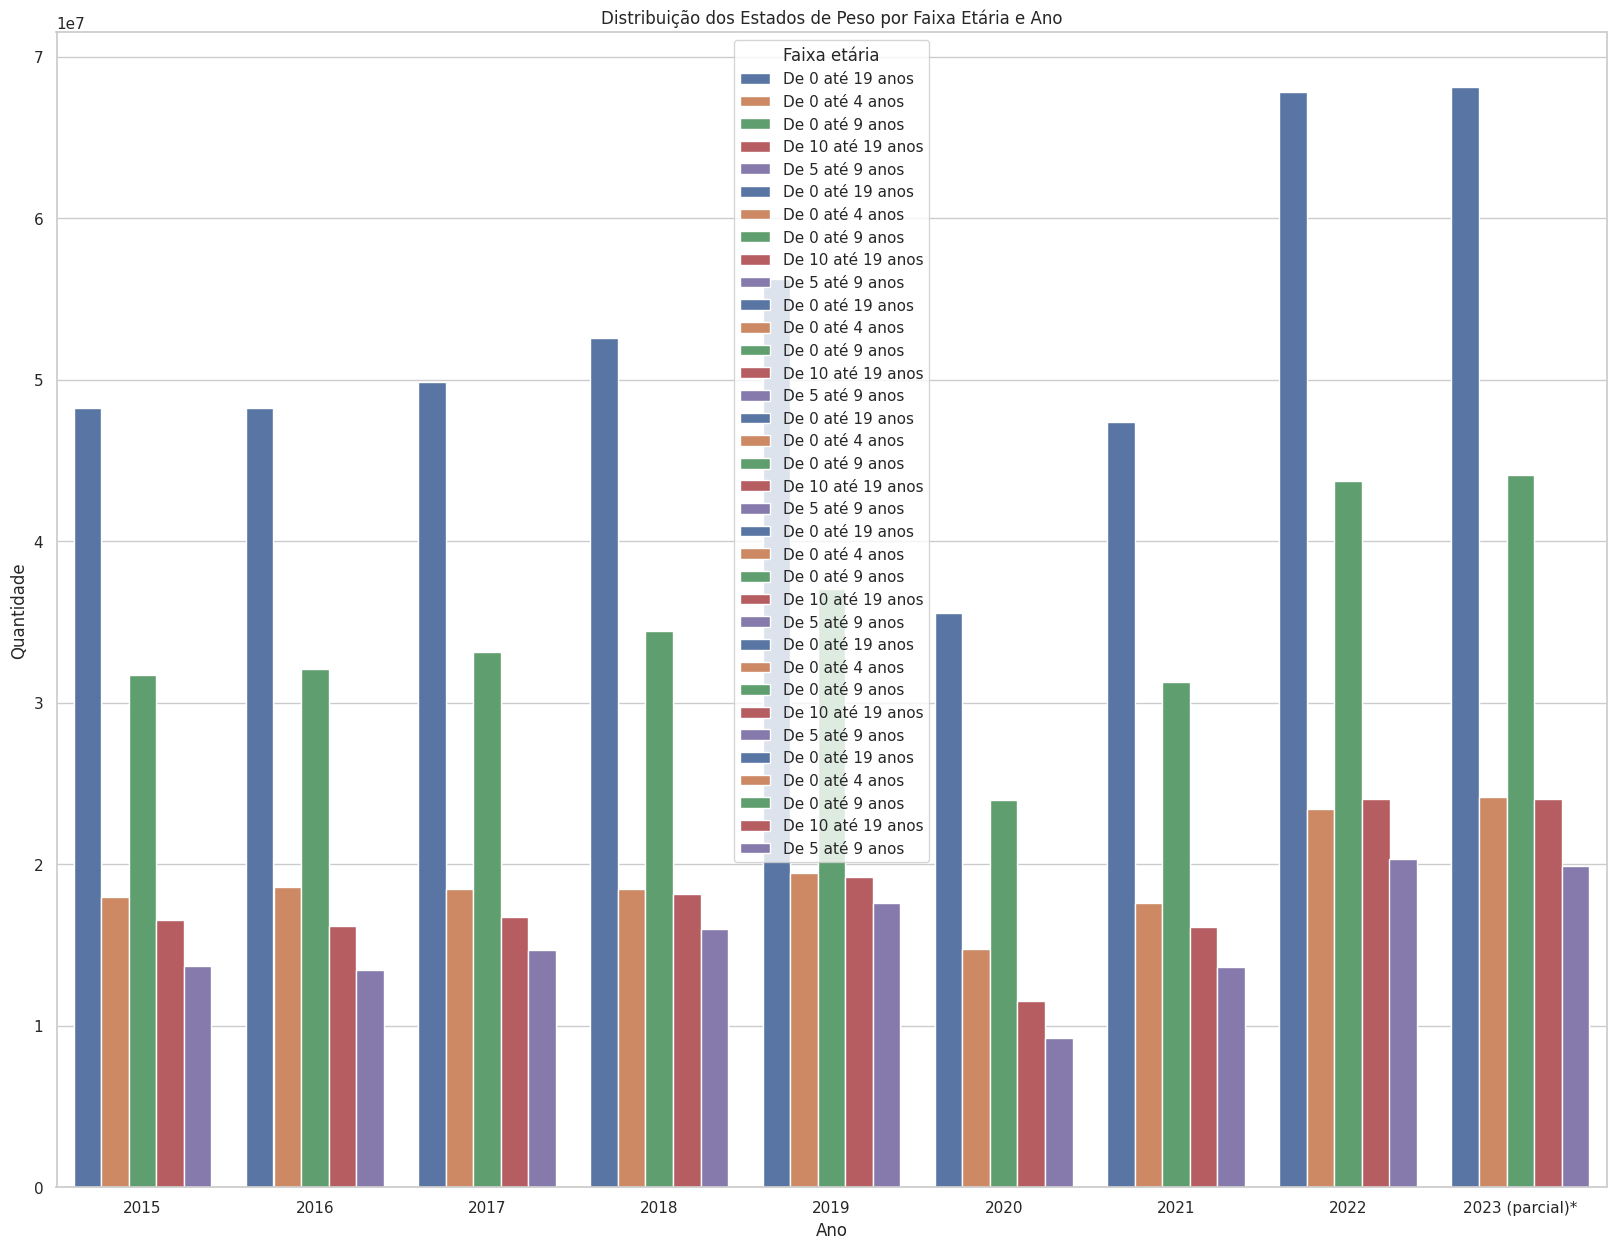

In [63]:
colunas_numericas = [
    'Magreza Acentuada Quantidade', 'Magreza Quantidade', 'Eutrofia Quantidade', 
    'Risco de Sobrepeso / Sobrepeso Quantidade', 'Sobrepeso / Obesidade Quantidade', 
    'Obesidade / Obesidade Grave Quantidade', 'Total'
]

for coluna in colunas_numericas:
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

df = df.fillna(0)

ano_faixa_etaria_data = df.groupby(['Ano', 'Faixa etária'])[colunas_numericas].sum().reset_index()

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(20, 15))

for coluna in colunas_numericas:
    sns.barplot(
        x='Ano', y=coluna, hue='Faixa etária', data=ano_faixa_etaria_data, ax=ax, errorbar=None
    )

plt.title('Distribuição dos Estados de Peso por Faixa Etária e Ano')
plt.ylabel('Quantidade')
plt.legend(title='Faixa etária')
plt.show()